<a href="https://colab.research.google.com/github/MitziVite/machine_learning/blob/main/notebooks/starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [3]:
import pandas as pd

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


Evaluation Metrics:
R² (Coefficient of Determination): 0.889
RMSE (Root Mean Squared Error): $129,658.21
MAE (Mean Absolute Error): $64,881.73
Top 10 Most Important Features for Predicting Price:
          Feature  Importance
8           grade    0.226129
5      waterfront    0.086070
2     sqft_living    0.067453
40  zipcode_98039    0.061041
19  zipcode_98004    0.056316
29  zipcode_98023    0.047871
13            lat    0.042105
18  zipcode_98003    0.026629
64  zipcode_98112    0.025406
6            view    0.024959


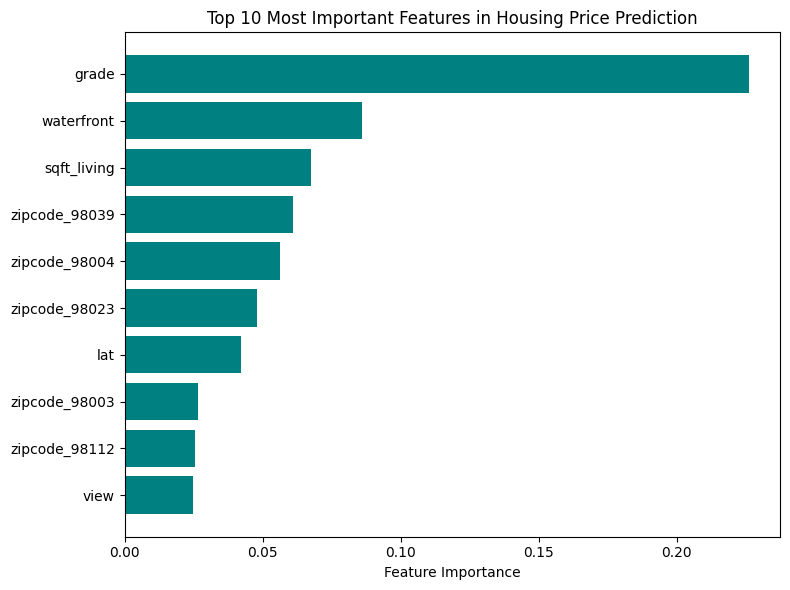

In [4]:

from xgboost import XGBRegressor, plot_importance
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

X = housing.drop(['price', 'id', 'date'], axis=1)
y = housing['price']


X = pd.get_dummies(X, columns=['zipcode'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.07,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"R² (Coefficient of Determination): {r2:.3f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"MAE (Mean Absolute Error): ${mae:,.2f}")

importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top10 = importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Most Important Features for Predicting Price:")
print(top10)


plt.figure(figsize=(8,6))
plt.barh(top10['Feature'], top10['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Most Important Features in Housing Price Prediction")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


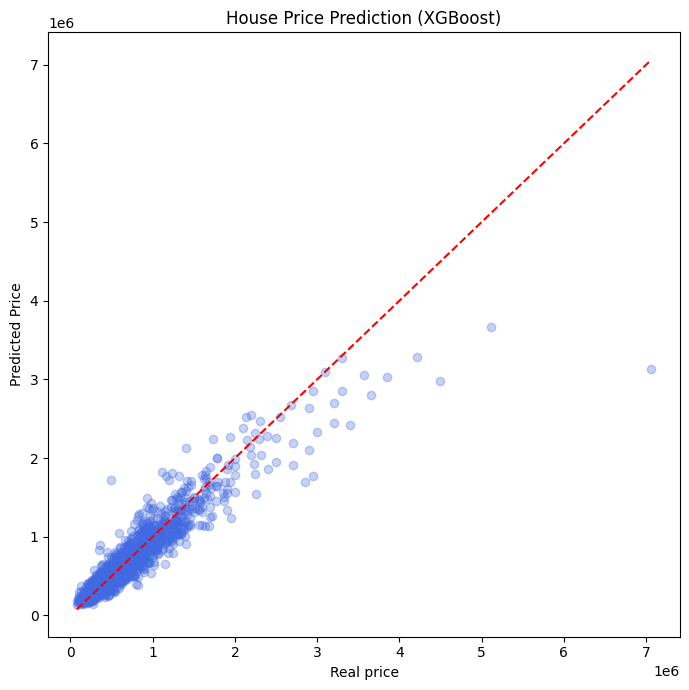

In [5]:

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.3, color='royalblue')
plt.xlabel("Real price")
plt.ylabel("Predicted Price")
plt.title("House Price Prediction (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


In [6]:

predictions_df = pd.DataFrame({'price': y_pred})
predictions_df.to_csv('team5-module3-predictions.csv', index=False)